# 1.1 Data Preparation

In [65]:
import numpy as np
from pandas import read_csv

In [66]:
def parse_csv(filepath: str):
    data = read_csv(filepath)

    # targets = array of target values (last column)
    targets = data.values[:, -1].astype(float)

    # inputs = array of input values (all columns except last)
    inputs = data.values[:, :-1].astype(float)

    return np.array(inputs), np.array(targets)

In [67]:
inputs, targets = parse_csv('glass-dataset.csv')

# 1.2 Classification

In [68]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [69]:
def pca(inputs):
    pca = PCA(n_components=2)
    
    return pca.fit_transform(inputs)

In [70]:
compressed = pca(inputs)

In [71]:
def knn(inputs, targets, k: int):
    classifier = KNeighborsClassifier(n_neighbors=k)
    
    classifier.fit(inputs, targets)
    
    return classifier.predict(inputs)

In [72]:
def how_good_is_k(inputs, targets, k: int):
    classifiedData = knn(inputs, targets, k)

    totalRight = 0
    totalEntries = len(targets)

    for i in range(totalEntries):
        if classifiedData[i] == targets[i]:
            totalRight += 1
    
    return totalRight / totalEntries

In [73]:
# Returns the most accurate k values' classified data
def classify_knn(inputs, targets):
    accuracies = []

    for k in range(1, 20):
        accuracies.append(how_good_is_k(inputs, targets, k))

    plt.figure()
    plt.plot(range(1, 20), accuracies)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title("Accuracy of kNN with different k values")
    plt.show()
    
    return knn(inputs, targets, accuracies.index(max(accuracies)) + 1)

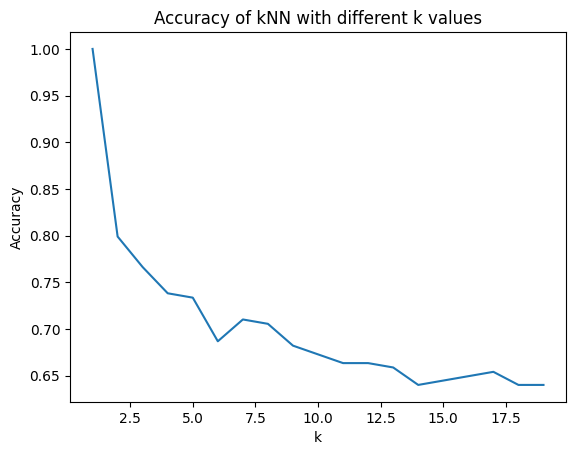

In [74]:
classifiedData = classify_knn(compressed, targets)

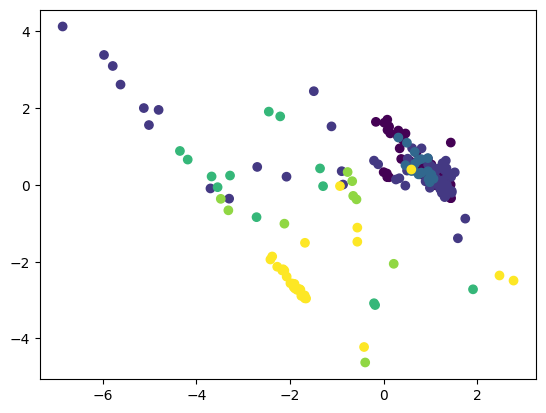

In [75]:
plt.figure()
plt.scatter(compressed[:, 0], compressed[:, 1], c=classifiedData)
plt.show()

In [76]:
# kernel can be "linear", "poly" or "rbf"
# degree can be 2 or 3
def svm(inputs, targets, kernel: str, degree: int):
    classifier = SVC(kernel=kernel, degree=degree)

    classifier.fit(inputs, targets)

    return classifier.predict(inputs)

In [77]:
def how_good_is_svm(inputs, targets, kernel, degree):
    classifiedData = svm(inputs, targets, kernel, degree)

    totalRight = 0
    totalEntries = len(targets)

    for i in range(totalEntries):
        if classifiedData[i] == targets[i]:
            totalRight += 1
    
    return totalRight / totalEntries

In [78]:
def classify_svm(inputs, targets):
    kernels = ["linear", "poly", "rbf"]
    degrees = [2, 3]
    accuracies = []

    for kernel in kernels:
        for degree in degrees:
            accuracies.append([kernel, degree, how_good_is_svm(inputs, targets, kernel, degree)])

    mostAccurate = max(accuracies, key=lambda x: x[2])

    return svm(inputs, targets, mostAccurate[0], mostAccurate[1])

In [79]:
classifiedData = classify_svm(inputs, targets)

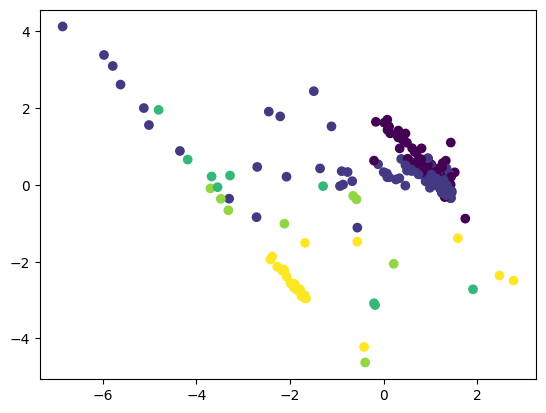

In [80]:
plt.figure()
plt.scatter(compressed[:, 0], compressed[:, 1], c=classifiedData)
plt.show()

# 1.3 Assessment of Classification

After identifying the best model parameters in the previous task, the classification models you have implemented must be assessed. To do this you are required to assess the accuracy for each model. You may use the accuracy implementation available to do this. It is not sufficient to report a single accuracy score. You must use cross-validation to report training results and report these values using a plot. You will also need to write a summary analysing your results and findings.

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
def svm_cross_val(inputs, targets, kernel: str, degree: int):
    classifier = SVC(kernel=kernel, degree=degree)

    return cross_val_score(classifier, inputs, targets, cv=10)

In [83]:
def knn_cross_val(inputs, targets, k: int):
    classifier = KNeighborsClassifier(n_neighbors=k)
    
    return cross_val_score(classifier, inputs, targets, cv=10)

In [84]:
knn_accuracies = knn_cross_val(compressed, targets, 3)
svm_accuracies = svm_cross_val(inputs, targets, "poly", 3)

/Users/bobbymannino/Code/comp2002-report/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/Users/bobbymannino/Code/comp2002-report/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


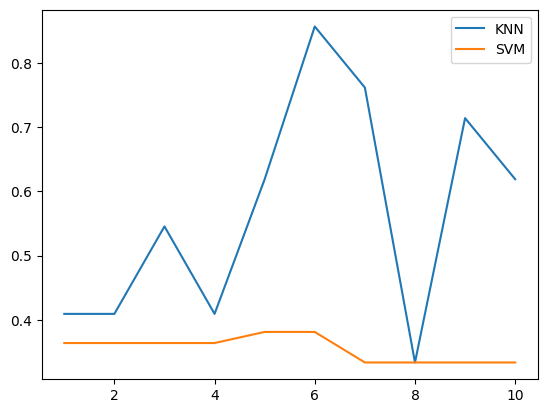

In [85]:
plt.figure()
plt.plot(range(1, 11), knn_accuracies, label="KNN")
plt.plot(range(1, 11), svm_accuracies, label="SVM")
plt.legend()
plt.show()